# **Import**

In [1]:
from fastai.vision.all import *

# **Data**

In [2]:
path = untar_data(URLs.PETS) / 'images'

In [3]:
path #이미지가 저장된 위치

Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images')

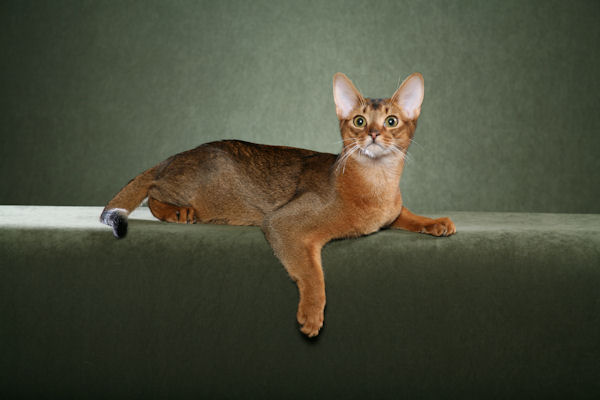

In [4]:
# Abyssinian_1.jpg 이미지 확인

PILImage.create('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [5]:
# get_image_files --> 하나의 폴더에서 모든 이미지 파일을 가져오는데 도움이 되는 fastai 함수

files = get_image_files(path)
files

(#7390) [Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

In [6]:
files[0]

Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

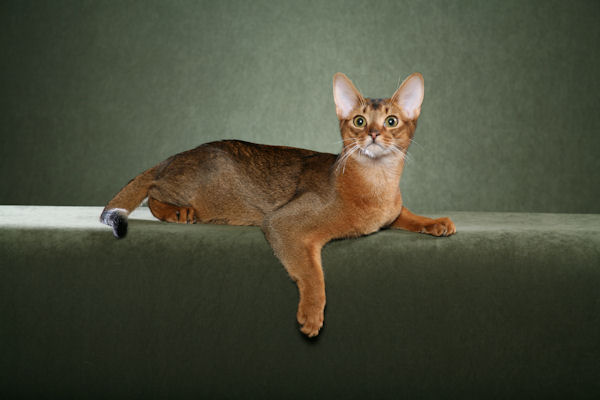

In [7]:
PILImage.create(files[0])

C:\Users\USER\.fastai\data\oxford-iiit-pet\images\Abyssinian_10.jpg


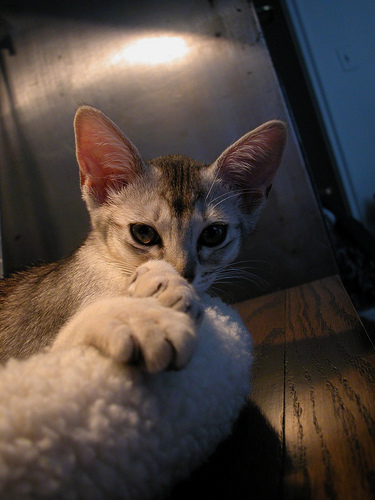

In [8]:
print(files[1])
PILImage.create(files[1])

In [9]:
# 데이터의 특징 --> 대문자로 시작하면 고양이, 소문자로 시작하면 강아지
# 데이터의 특징 --> 이미지의 크기가 모두 다름

In [10]:
def label_func(fname):
  if fname[0].isupper():
    return 'cat'
  else:
    return 'dog'

In [11]:
# path 경로에서 files 데이터를 불러와 X를 생성
# label_func의 함수내용을 바탕으로 y 생성
# item_tfms에 정의된 방식으로 X를 변환하여 저장

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


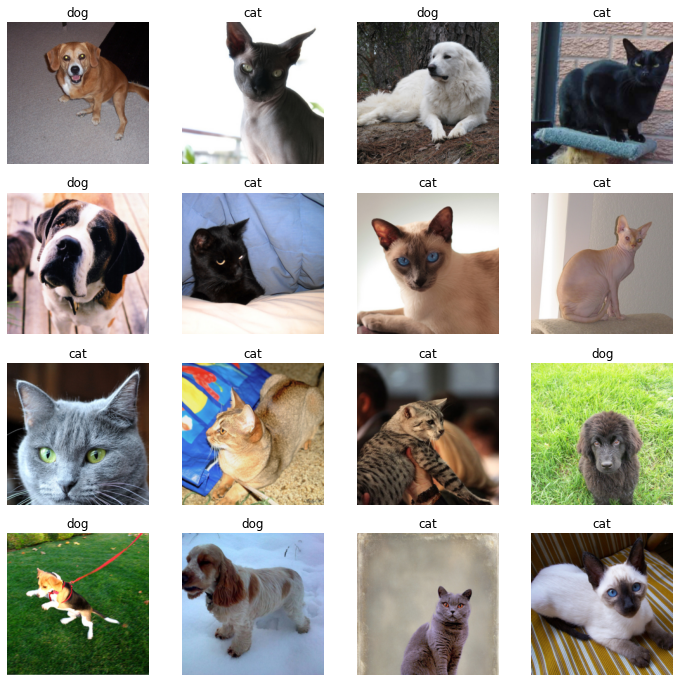

In [12]:
dls.show_batch(max_n = 16)

# **학습**

In [13]:
clsfr = cnn_learner(dls, resnet34, metrics = error_rate)

C:\Users\USER\anaconda3\lib\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [14]:
clsfr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.139904,0.023246,0.008796,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.053021,0.018941,0.005413,00:39


# 정확도 **예측**

In [15]:
files[0] # 강아지

Path('C:/Users/USER/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [16]:
clsfr.predict(files[0])

('cat', TensorBase(0), TensorBase([1.0000e+00, 9.4701e-08]))

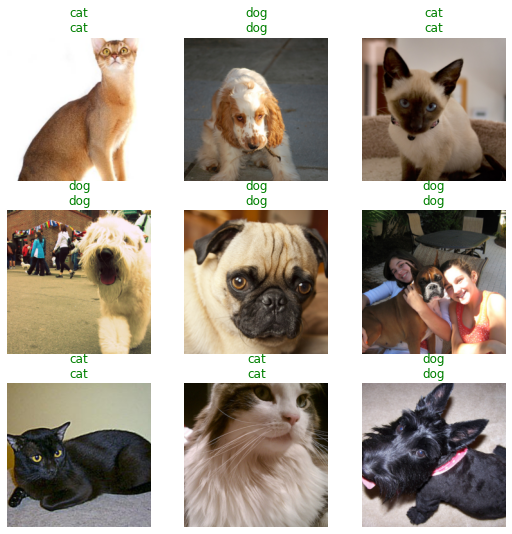

In [17]:
clsfr.show_results()

# **오답분석**

In [18]:
interpreter = Interpretation.from_learner(clsfr)

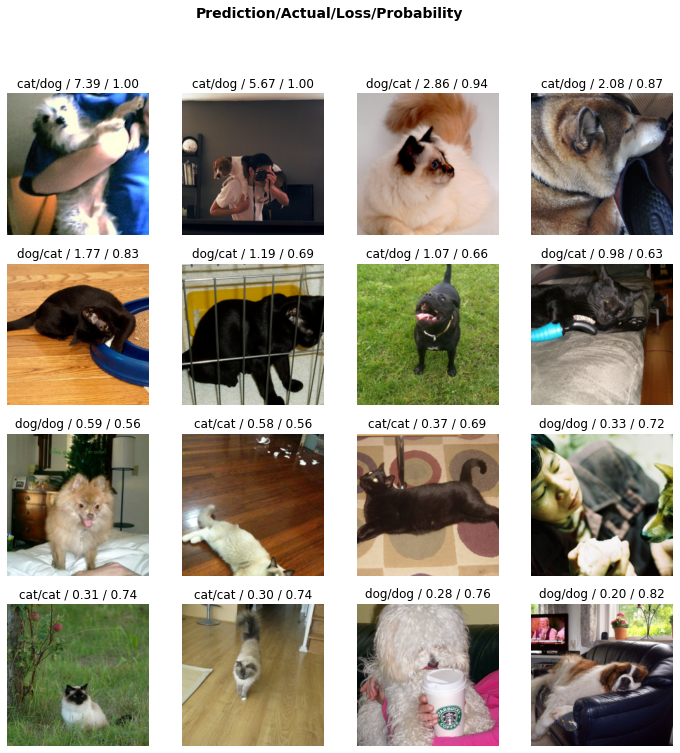

In [19]:
interpreter.plot_top_losses(16)